# Oxford Parkinson's Disease Detection Dataset

Realizado por Juan Pablo Ramirez Gutierrez, Daider Ebratt, Isaac Amador, Braulio Tovar  

Este proyecto se centra en el análisis de un conjunto de datos relacionado con el diagnóstico de la enfermedad de Parkinson. 
La enfermedad de Parkinson es un trastorno neurológico crónico que afecta principalmente las habilidades motoras de las personas y, en fases avanzadas, su capacidad cognitiva. Con el aumento en los casos y la necesidad de herramientas de diagnóstico tempranas, es fundamental explorar y analizar patrones en los datos que puedan apoyar en la identificación de esta enfermedad.
El dataset utilizado en este proyecto ha sido obtenido de la *UCI Machine Learning Repository*, el cual proporciona características extraídas a partir de señales vocales de personas con y sin Parkinson. Cada registro en el dataset contiene múltiples medidas de frecuencia y perturbaciones vocales que pueden ser útiles para identificar la presencia de la enfermedad.

Por lo tanto, el objetivo de este proyecto es...

Entender la distribución de las características en personas con y sin Parkinson.
Identificar patrones significativos que puedan diferenciar a los grupos.
Realizar visualizaciones y análisis estadísticos para obtener una visión general de las características vocales asociadas con la enfermedad.
    
Este análisis pretende proporcionar una base para la implementación de modelos de aprendizaje automático que puedan mejorar la precisión en el diagnóstico de Parkinson a partir de datos de voz, por lo que surge como pregunta principal...

**¿Es posible predecir la presencia de la enfermedad de Parkinson basándose en características de la voz (como Jitter, Shimmer, NHR, HNR)?**


Exploración de Datos

Los atributos del conjunto de datos son los siguientes:

1. MDVP:Fo(Hz): Frecuencia fundamental en Hertzios (Hz) medida durante una tarea de fonación. Refleja la tonalidad de la voz de una persona.
  
2. MDVP:Fhi(Hz): Frecuencia máxima en Hertzios (Hz) durante la fonación. Indica la mayor frecuencia alcanzada por la voz.
  
3. MDVP:Flo(Hz)*: Frecuencia mínima en Hertzios (Hz) durante la fonación. Representa la frecuencia más baja de la voz.

4. MDVP:Jitter(%): Medida de variación de la frecuencia (jitter) en porcentaje. Un valor más alto puede indicar irregularidades en la voz, lo cual es común en personas con Parkinson.

5. MDVP:Jitter(Abs): Medida absoluta de jitter. Similar al jitter en porcentaje, pero expresa la variación en una escala absoluta.

6. MDVP:RAP: Relación de amplitud de la variación de la frecuencia (Relative Amplitude Perturbation). Indica la variación de la frecuencia a lo largo de un período.

7. MDVP:PPQ: Promedio de perturbación de la frecuencia (Pitch Perturbation Quotient). Otro indicador de la variabilidad de la frecuencia en la voz.

8. Jitter:DDP: Medida de jitter de intervalo de duración de pulsos. Es otra forma de evaluar la variación en la producción vocal.

9. MDVP:Shimmer: Medida de variación de la amplitud (shimmer) de la voz. Refleja cuán consistente es la amplitud de la voz durante la fonación.

10. MDVP:Shimmer(dB): Shimmer en decibelios. Expresa la variación de amplitud en una escala logarítmica, más fácil de interpretar en términos auditivos.

11. Shimmer:APQ3: Promedio de perturbación de amplitud. Evalúa la variabilidad de la amplitud de la voz.

12. Shimmer:APQ5: Similar a APQ3, pero usa un enfoque diferente para evaluar la perturbación de amplitud.

13. Shimmer:APQ11: Otro promedio de perturbación de amplitud que proporciona una vista adicional de la variabilidad.

14. Shimmer:DDA: Shimmer de duración de pulso. Evaluación de variabilidad en la duración de la producción vocal.

15. NHR: Relación de ruido a armónicos. Indica cuán ruidosa es la voz en comparación con la tonalidad.

16. HNR: Relación de ruido a tono (Harmonic-to-Noise Ratio). Mide la cantidad de ruido en la voz.

17. status: Diagnóstico del paciente. Puede ser "Parkinson" o "No Parkinson", indicando si el paciente tiene la enfermedad o no.

18. name: Nombre del archivo de audio utilizado para extraer las características.

Al analizar los datos, se puede observar patrones que ayuden a diferenciar a los pacientes con Parkinson de aquellos sin la enfermedad. Las medidas de **jitter** y **shimmer**, así como la relación de ruido a armónicos (**NHR** y **HNR**), son especialmente relevantes para evaluar la calidad de la voz y son indicadores clave en el diagnóstico de Parkinson.

Conteo de casos (195):
Casos con Parkinson (1): 147
Casos sin Parkinson (0): 48


Para tener presente durante toda esta documentación...

- **MDVP: Jitter (Variación en la frecuencia fundamental)**. Mide la variabilidad en la frecuencia fundamental (o tono) de las vocalizaciones. Es decir, es el pequeño cambio irregular en la frecuencia de las vibraciones de las cuerdas vocales durante una emisión de voz.

- **MDVP: Shimmer (Variación en la amplitud de la voz)**. mide la variabilidad en la amplitud o intensidad de la voz. Es decir, es el cambio en la presión de aire que se produce durante la emisión del sonido, lo que afecta al volumen y la claridad de la voz.

**Importancia en el diagnóstico de Parkinson**: Al igual que con el Jitter, las personas con Parkinson pueden experimentar una disminución en el control de la voz debido a la rigidez muscular. Tanto **un nivel de Shimmer y/o jitter elevado** puede ser indicativo de padecimiento de Parkinson. 

- **NHR (Relación de ruido a armónicos**. es la relación entre el ruido y los armónicos en una señal de voz. Los armónicos son las frecuencias que forman el tono principal de la voz, mientras que el ruido se refiere a las frecuencias no deseadas que pueden ser causadas por una mala vibración de las cuerdas vocales.

- **HNR (Relación de armónicos a ruido)**. Mide la cantidad de armónicos (frecuencias tonales) en comparación con el ruido. Un HNR bajo significa que hay más ruido que armónicos en la señal vocal, lo que generalmente se asocia con una calidad vocal deteriorada.

Importancia en el diagnóstico de Parkinson: En personas con Parkinson, **Un HNR bajo y/o un NHR elevado** puede ser un indicador de problemas en la calidad de la voz relacionados con la enfermedad.


In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Descargar el dataset usando fetch_ucirepo
parkinsons = fetch_ucirepo(id=174)

# Extraer las características (X) y el objetivo (y) en un solo DataFrame
data = pd.concat([parkinsons.data.features, parkinsons.data.targets], axis=1)

# Exportar a CSV
csv_file_path = 'parkinsons_dataset.csv' 
data.to_csv(csv_file_path, index=False)

print(f"El dataset ha sido exportado como '{csv_file_path}'.")


El dataset ha sido exportado como 'parkinsons_dataset.csv'.


el dataset se obtiene usando fetch_ucirepo. Luego, las características (X) y el objetivo (y) se combinan en un solo DataFrame para simplificar la manipulación y visualización.
El archivo resultante se guarda en la ubicación actual del script con el nombre parkinsons_dataset.csv

Nota. La finalidad del uso del dataset por un csv es para un mayor control y facilidad al compartir este proyecto.

In [5]:
# Cargar el dataset
data = pd.read_csv('parkinsons_dataset.csv')

# Verificar las primeras filas del dataset
data.head()

# Revisar información general sobre los datos (tipos de datos, valores nulos, etc.)
data.info()

# Revisar si hay valores faltantes
data.isnull().sum()

# Revisar la distribución de las clases
data['status'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo         195 non-null    float64
 1   MDVP:Fhi        195 non-null    float64
 2   MDVP:Flo        195 non-null    float64
 3   MDVP:Jitter     195 non-null    float64
 4   MDVP:Jitter.1   195 non-null    float64
 5   MDVP:RAP        195 non-null    float64
 6   MDVP:PPQ        195 non-null    float64
 7   Jitter:DDP      195 non-null    float64
 8   MDVP:Shimmer    195 non-null    float64
 9   MDVP:Shimmer.1  195 non-null    float64
 10  Shimmer:APQ3    195 non-null    float64
 11  Shimmer:APQ5    195 non-null    float64
 12  MDVP:APQ        195 non-null    float64
 13  Shimmer:DDA     195 non-null    float64
 14  NHR             195 non-null    float64
 15  HNR             195 non-null    float64
 16  RPDE            195 non-null    float64
 17  DFA             195 non-null    flo

status
1    147
0     48
Name: count, dtype: int64

Con esto podemos verificar que el dataset está completo (sin valores nulos) y que los datos son en su mayoría de tipo float64, excepto la columna 'status' que es de tipo int64, lo cual es adecuado ya que contiene las etiquetas de las clases: 1 para personas con Parkinson y 0 para personas sin Parkinson. 

Además, se puede ver que hay 195 registros en total y 23 columnas, todas numericas, exepto estatus. 

Cómo se mención anteriormemte, 147 de los registros afirman que la persona tiene Parkinson, y 48 se niega; Este desbalance podría afectar el rendimiento de los modelos, por lo que podríamos necesitar técnicas de manejo de clases desbalanceadas (como sobre-muestreo o sub-muestreo).

In [6]:
# Revisar estadísticas descriptivas del dataset
data.describe()

#  Revisar los valores máximos, mínimos, medias y desviaciones estándar de las características más relevantes, como las de jitter y shimmer
data[['MDVP:Jitter', 'MDVP:Shimmer', 'NHR', 'HNR']].describe()


,MDVP:Jitter,MDVP:Shimmer,NHR,HNR
count,195.000000,195.000000,195.000000,195.000000
mean,0.006220,0.029709,0.024847,21.885974
std,0.004848,0.018857,0.040418,4.425764
min,0.001680,0.009540,0.000650,8.441000
25%,0.003460,0.016505,0.005925,19.198000
50%,0.004940,0.022970,0.011660,22.085000
75%,0.007365,0.037885,0.025640,25.075500
max,0.033160,0.119080,0.314820,33.047000


La variación de MDVP (tanto en Jitter o Shimmer) tiene un rango amplio, lo que podría indicar que hay personas con valores muy bajos (más estables) y otras con valores más altos (más inestables). Esto es relevante porque las personas con Parkinson a menudo tienen una voz más inestable.

El NHR tiene una desviación estándar alta, lo que sugiere que hay una gran variabilidad en la relación de ruido a armónicos entre los sujetos. Este valor podría ser útil para identificar irregularidades en la voz de los pacientes con Parkinson, ya que suelen tener más ruido en sus señales vocales.

HNR tiene una media relativamente alta, pero también una desviación estándar considerable, lo que implica una diversidad considerable entre los sujetos. Los pacientes con Parkinson generalmente tienen una menor relación de armónicos a ruido, lo que puede reflejar la dificultad en la producción vocal.


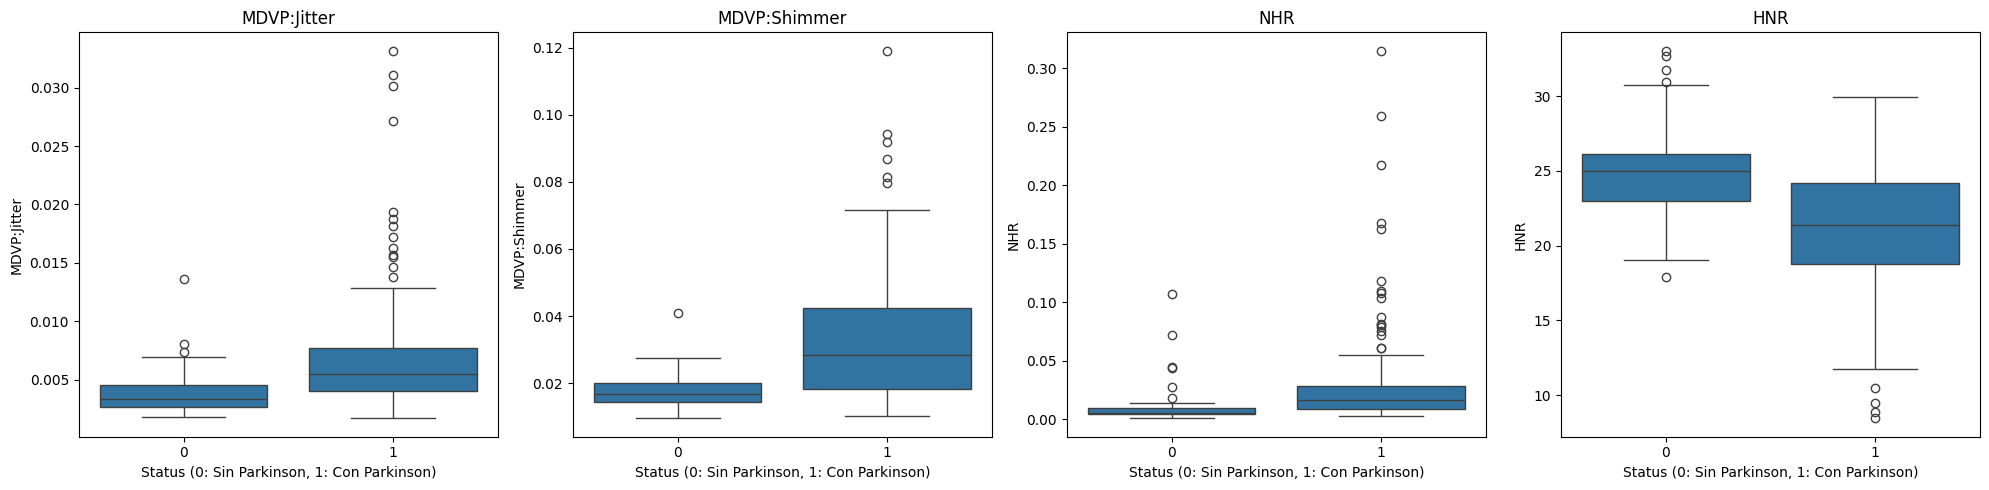

In [9]:
#biblioteca de visualización basada en matplotlib. 
#Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la figura con 4 gráficos en una fila
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

# Comparar MDVP:Jitter entre personas con y sin Parkinson
sns.boxplot(ax=axes[0], x='status', y='MDVP:Jitter', data=data)
axes[0].set_title('MDVP:Jitter')
axes[0].set_xlabel('Status (0: Sin Parkinson, 1: Con Parkinson)')
axes[0].set_ylabel('MDVP:Jitter')

# Comparar MDVP:Shimmer entre personas con y sin Parkinson
sns.boxplot(ax=axes[1], x='status', y='MDVP:Shimmer', data=data)
axes[1].set_title('MDVP:Shimmer')
axes[1].set_xlabel('Status (0: Sin Parkinson, 1: Con Parkinson)')
axes[1].set_ylabel('MDVP:Shimmer')

# Comparar NHR entre personas con y sin Parkinson
sns.boxplot(ax=axes[2], x='status', y='NHR', data=data)
axes[2].set_title('NHR')
axes[2].set_xlabel('Status (0: Sin Parkinson, 1: Con Parkinson)')
axes[2].set_ylabel('NHR')

# Comparar HNR entre personas con y sin Parkinson
sns.boxplot(ax=axes[3], x='status', y='HNR', data=data)
axes[3].set_title('HNR')
axes[3].set_xlabel('Status (0: Sin Parkinson, 1: Con Parkinson)')
axes[3].set_ylabel('HNR')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()




Esto indica que...

-**MDVP**: Las personas con Parkinson (status = 1) tienden a tener valores de MDVP más altos en comparación con aquellas sin Parkinson (status = 0); además de una mayor dispersión y presencia de valores atípicos.

-**MDVP**: También en este caso, las personas con Parkinson presentan valores más altos en MDVP que aquellas sin Parkinson. 

-**NHR**: Similar a los anteriores, los valores de NHR tienden a ser más altos en las personas con Parkinson, aunque la diferencia entre ambos grupos es menos marcada. La dispersión es mayor en el grupo con Parkinson, lo cual también se refleja en la presencia de varios valores atípicos.

-**HNR**: En este caso, la relación es inversa. Las personas sin Parkinson tienden a tener valores de HNR más altos en comparación con aquellas con Parkinson, lo cual coincide con la correlación negativa observada anteriormente. La dispersión de los valores también es notable, con algunos valores atípicos en ambos grupos.

El Jitter y Shimmer tiende a ser más elevado en personas con Parkinson en comparación con las personas sin la enfermedad.

Con base en estas observaciones, MDVP, MDVP, NHR y HNR son buenas candidatas para el modelo, ya que presentan diferencias notables entre los grupos.


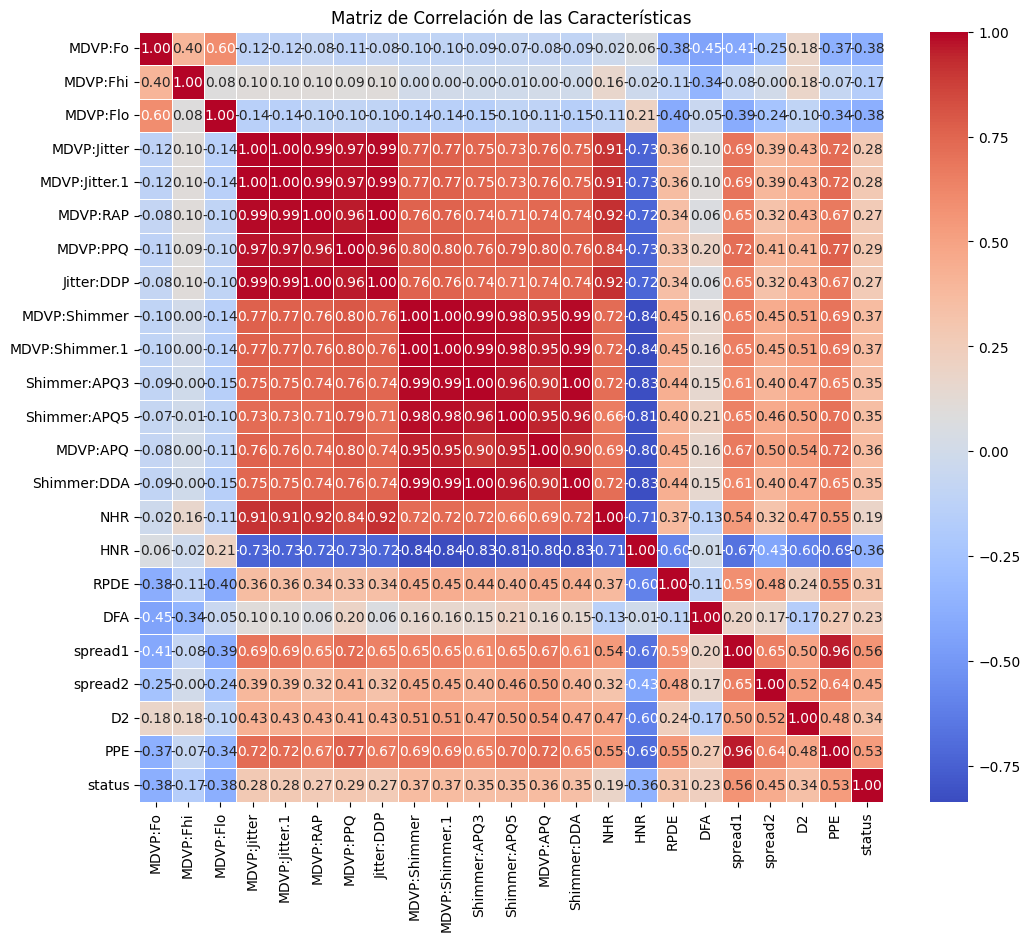

MDVP:Jitter     0.278220
MDVP:Shimmer    0.367430
NHR             0.189429
HNR            -0.361515
Name: status, dtype: float64


In [8]:
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Características')
plt.show()

correlation_with_status = corr_matrix['status'][['MDVP:Jitter', 'MDVP:Shimmer', 'NHR', 'HNR']]
print(correlation_with_status)


La matriz de correlación muestra cómo se relacionan entre sí las diferentes características en el conjunto de datos, con valores de correlación entre -1 y 1.  algunos grupos de características tienen correlaciones muy altas, lo que significa que están altamente relacionadas entre sí. Por ejemplo:

Variables con alta correlación positiva (cerca de 1): Esto sugiere que las variables tienden a aumentar o disminuir juntas. Algunos pares como MDVP:Jitter y MDVP:Jitter.1, o MDVP:Shimmer y MDVP:Shimmer.1, muestran esta relación. Las altas correlaciones positivas indican que una de las variables en el par podría ser redundante en el análisis.

Variables con alta correlación negativa (cerca de -1): Estas muestran relaciones inversas, donde una variable aumenta mientras la otra disminuye. En este caso, spread1 y spread2 parecen tener una correlación negativa significativa con otras variables.

Variables con correlaciones bajas (cerca de 0): Esto sugiere poca o ninguna relación lineal entre las variables. La falta de correlación puede ser importante para indicar variables independientes en el conjunto de datos.

Finalmente, la columna status muestra correlaciones con algunas variables, como MDVP:Shimmer y HNR, lo cual es relevante para entender qué variables pueden estar más relacionadas con el diagnóstico de Parkinson.


Esto dicta que:
- **MDVP** tiene la correlación positiva más alta con status (0.367), sugiriendo que el aumento en el valor de **Shimmer** se asocia con una mayor probabilidad de diagnóstico de Parkinson.
- **HNR** muestra una correlación negativa (-0.361), lo que significa que un valor más bajo de HNR tiende a estar relacionado con la presencia de Parkinson.
- **MDVP** tiene una correlación moderada (0.278), también positiva, mientras que NHR tiene una correlación baja (0.189).

Estos resultados sugieren que **MDVP** y **HNR** podrían ser las características más relevantes en la detección de Parkinson dentro de este conjunto de datos.

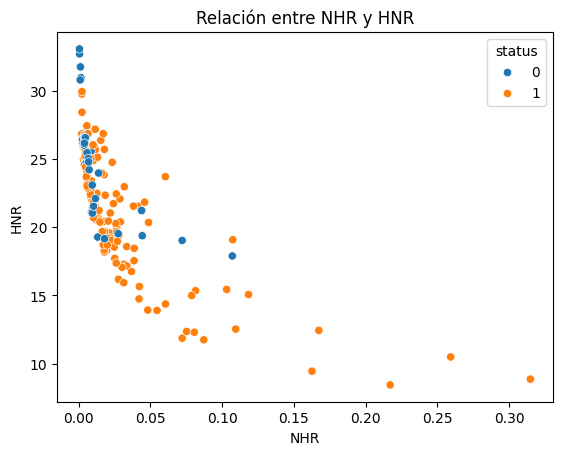

In [8]:
# visualizar la distribución de NHR y HNR con un scatterplot
sns.scatterplot(x='NHR', y='HNR', hue='status', data=data)
plt.title('Relación entre NHR y HNR')
plt.show()


sadsadasd

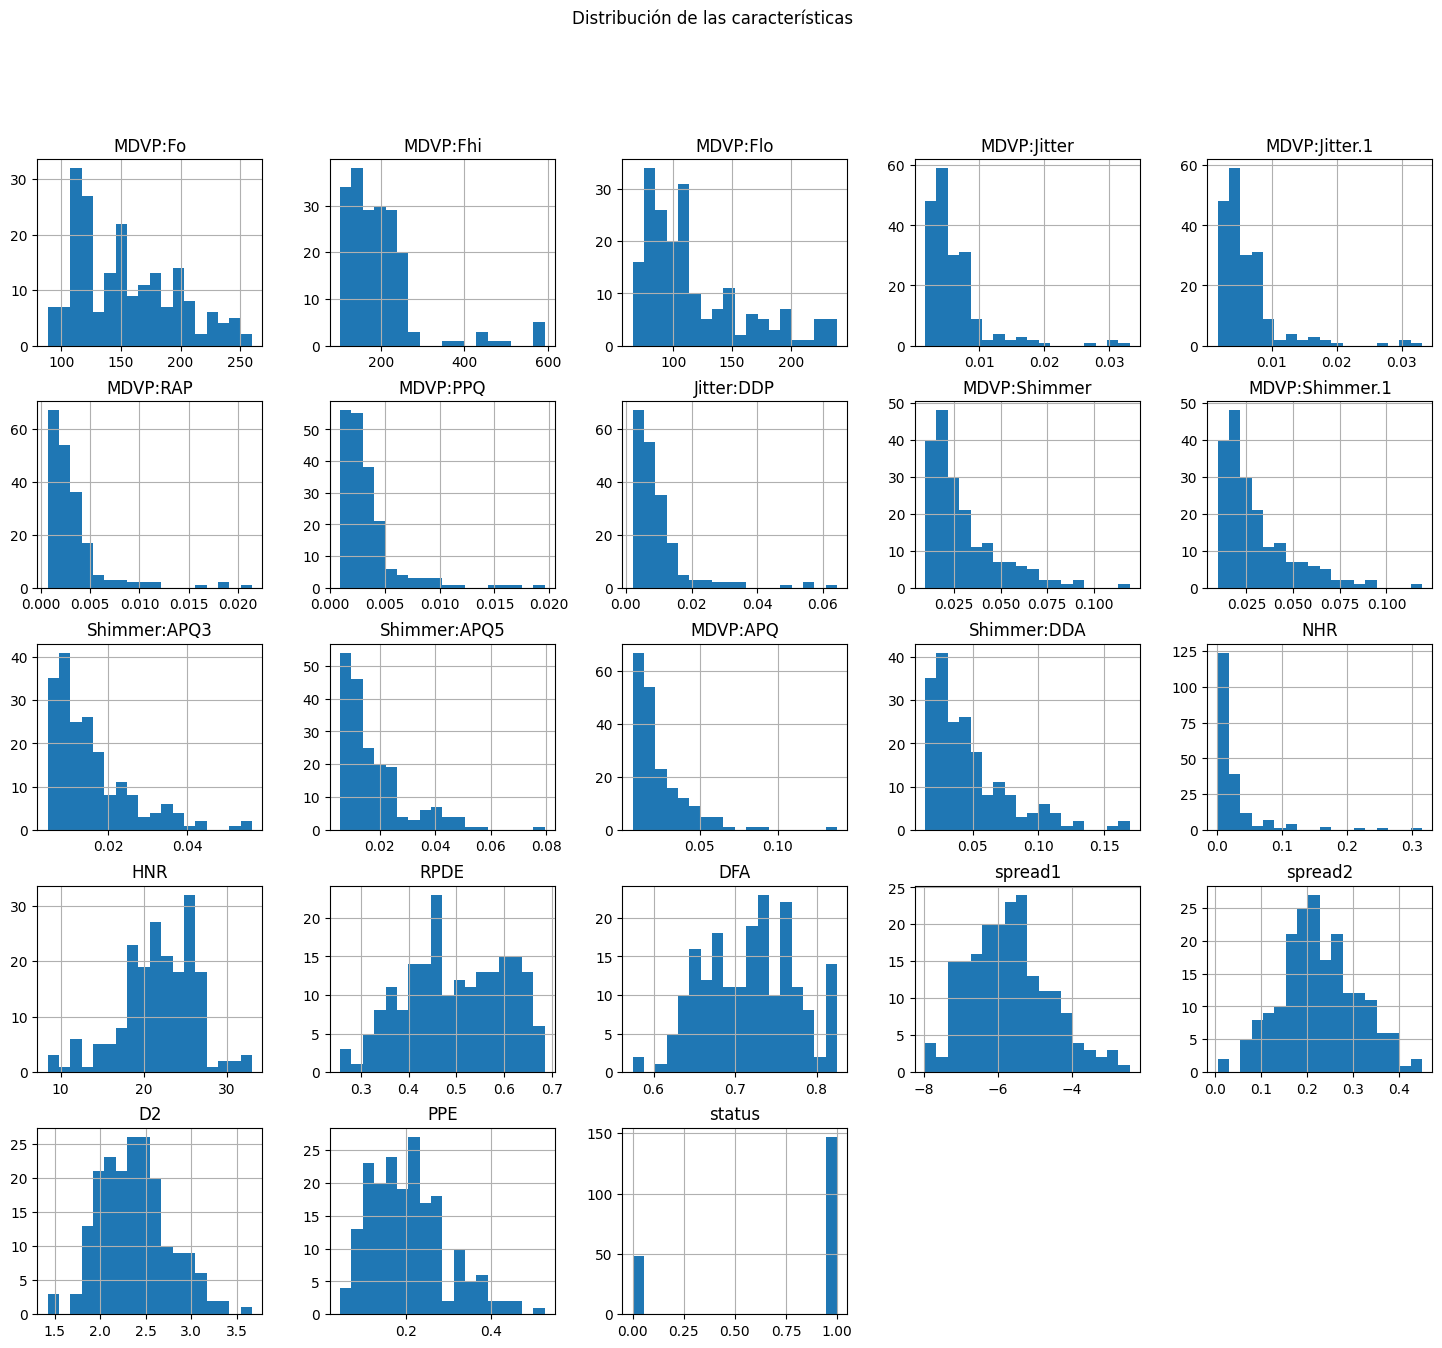

In [14]:
data.hist(bins=18, figsize=(18, 15))
plt.suptitle('Distribución de las características')
plt.show()


sdadasd

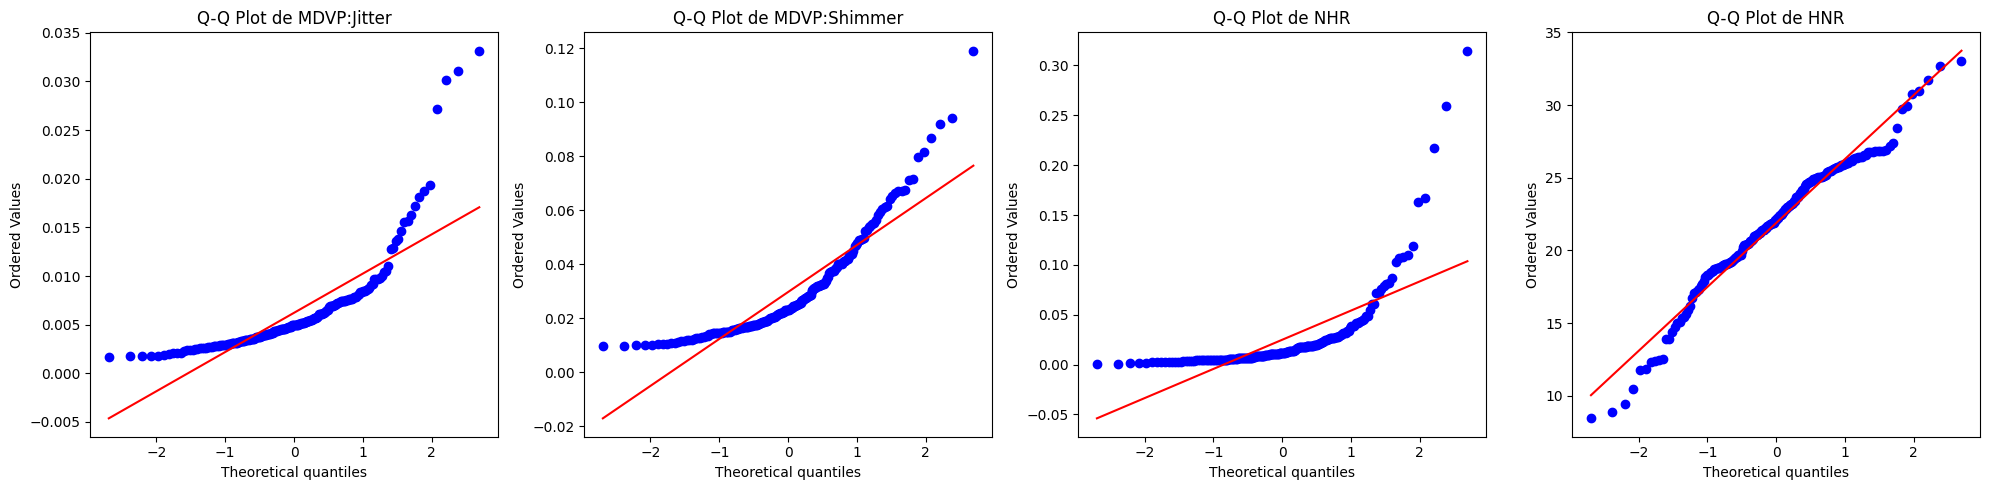

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuración de la figura con 4 gráficos en una fila
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 fila, 4 columnas

for i, col in enumerate(['MDVP:Jitter', 'MDVP:Shimmer', 'NHR', 'HNR']):
    # Graficar el Q-Q plot en la subfigura correspondiente
    stats.probplot(data[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot de {col}')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


In [ ]:
hdskfjsdkhf

PASO feature engineering!!
Ver si es necesario usar alguna técnica de normalización o estandarización en estas características MDVP
, MDVP
, NHR y HNR antes de proceder al modelado